**Importing Libraries**


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

**Importing Dataset**


In [44]:
data=pd.read_csv('diabet.csv')

**Exploratory Data Analysis**


In [45]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [47]:
data.shape

(100000, 9)

We have 100 000 rows and 9 columns(features)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [49]:
# Assuming 'df' is your DataFrame
cat_cols = ["gender", "smoking_history"]
enc = OrdinalEncoder()

# Assuming df contains the specified categorical columns
data[cat_cols] = enc.fit_transform(data[cat_cols]).astype(int)

# Display the first 5 rows of the DataFrame
print(data.head(5))


   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


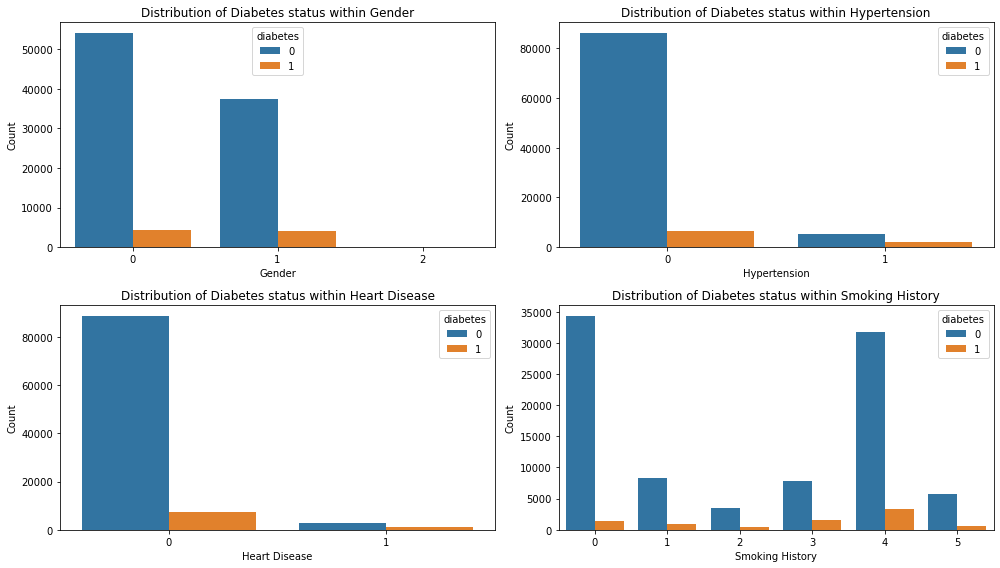

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
# Chart 1: Distribution of gender
sns.countplot(x="gender", data=data,hue = 'diabetes',ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes status within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

# Chart 2: Distribution of a hypertension
sns.countplot(x="hypertension", data=data, hue = 'diabetes', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

# Chart 3: Distribution of heart disease
sns.countplot(x="heart_disease", hue = 'diabetes',data=data, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Diabetes status within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Count")

#Chart 4: Distribution of smoking history
sns.countplot(x="smoking_history", data=data, hue = 'diabetes', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Diabetes status within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Count")



plt.tight_layout()
plt.show()

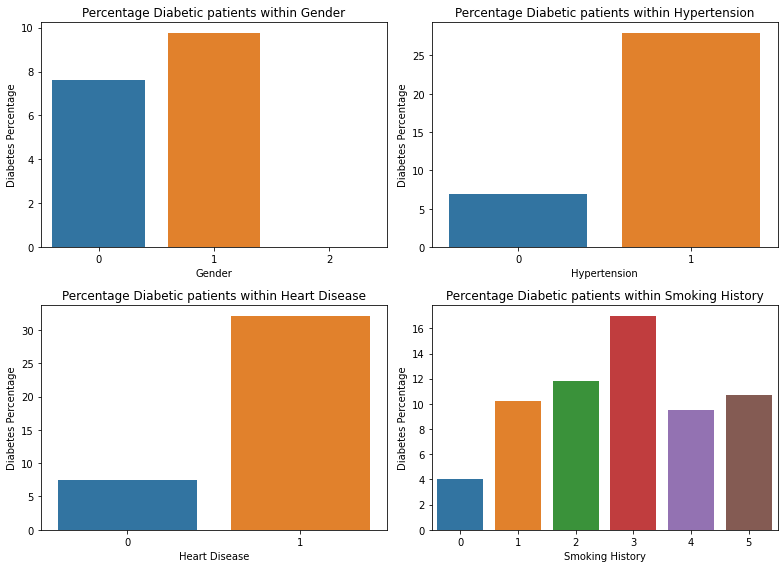

In [51]:
# Calculate the percentage of diabetes status within each category
gender_percentages = data.groupby('gender')['diabetes'].mean() * 100
hypertension_percentages = data.groupby('hypertension')['diabetes'].mean() * 100
heart_disease_percentages = data.groupby('heart_disease')['diabetes'].mean() * 100
smoking_history_percentages = data.groupby('smoking_history')['diabetes'].mean() * 100

# Plotting categorical features alongside target feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

# Chart 1: Distribution of gender
sns.barplot(x=gender_percentages.index, y=gender_percentages.values, ax=axes[0, 0])
axes[0, 0].set_title("Percentage Diabetic patients within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Diabetes Percentage")

# Chart 2: Distribution of hypertension
sns.barplot(x=hypertension_percentages.index, y=hypertension_percentages.values, ax=axes[0, 1])
axes[0, 1].set_title("Percentage Diabetic patients within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Diabetes Percentage")

# Chart 3: Distribution of heart disease
sns.barplot(x=heart_disease_percentages.index, y=heart_disease_percentages.values, ax=axes[1, 0])
axes[1, 0].set_title("Percentage Diabetic patients within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Diabetes Percentage")

# Chart 4: Distribution of smoking history
sns.barplot(x=smoking_history_percentages.index, y=smoking_history_percentages.values, ax=axes[1, 1])
axes[1, 1].set_title("Percentage Diabetic patients within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Diabetes Percentage")

plt.tight_layout()
plt.show()

In [52]:
#check for null values
data.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

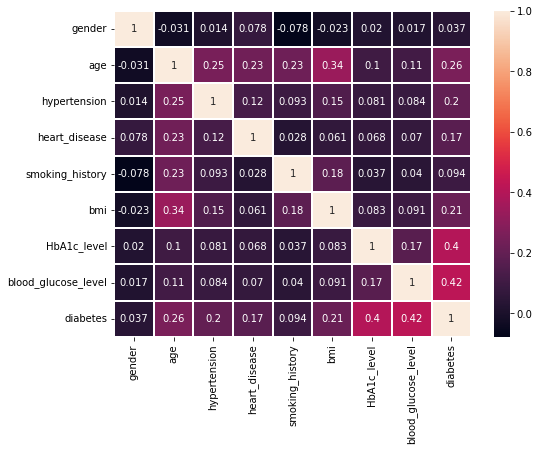

In [53]:
#checking correlation between features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

**Interpretation:**
* Features with high positive correlation values (close to 1) tend to
move in the same direction.
* Features with high negative correlation values (close to -1) tend to move in opposite directions.
* Features with correlation values close to 0 have a weak linear relationship.

In [54]:
data.describe()
#habit nra win aandi kes 0

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


It's impossible to have hypertension & heart_disease with zeos



In [55]:
#replace zero values with np.nan to visualize them
zero_not_accepted = ["hypertension", "heart_disease"]
for col in zero_not_accepted:
    data[col].replace(0, np.nan, inplace=True)

#checkf if zeros were replaced in required columns
data.head(n=10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,NaN,1.0,4,25.19,6.6,140,0
1,0,54.0,NaN,NaN,0,27.32,6.6,80,0
2,1,28.0,NaN,NaN,4,27.32,5.7,158,0
3,0,36.0,NaN,NaN,1,23.45,5.0,155,0
4,1,76.0,1.0,1.0,1,20.14,4.8,155,0
5,0,20.0,NaN,NaN,4,27.32,6.6,85,0
6,0,44.0,NaN,NaN,4,19.31,6.5,200,1
7,0,79.0,NaN,NaN,0,23.86,5.7,85,0
8,1,42.0,NaN,NaN,4,33.64,4.8,145,0
9,0,32.0,NaN,NaN,4,27.32,5.0,100,0


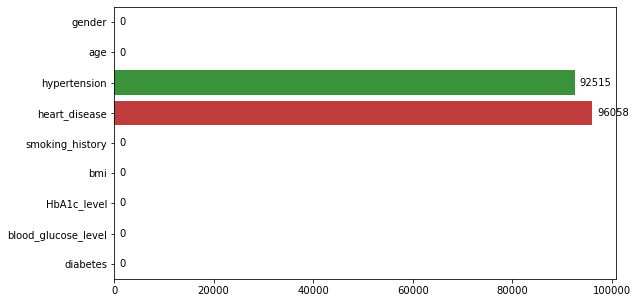

In [56]:
#Visualizing Null values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=data.isna().sum(),
           y=data.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points',
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

==> hypertension and heart_disease aandhom barcha zerowett

In [57]:
#imputing mean instead of null values
for col in zero_not_accepted:
    data[col].replace(np.nan, data[col].mean(), inplace=True)

In [58]:
# Data check after replaceing zero values
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
gender,100000.0,0.41,0.49,0.00,0.00,0.00,1.00,2.00
age,100000.0,41.89,22.52,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
heart_disease,100000.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
smoking_history,100000.0,2.18,1.89,0.00,0.00,3.00,4.00,5.00
bmi,100000.0,27.32,6.64,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.53,1.07,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.06,40.71,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.08,0.28,0.00,0.00,0.00,0.00,1.00


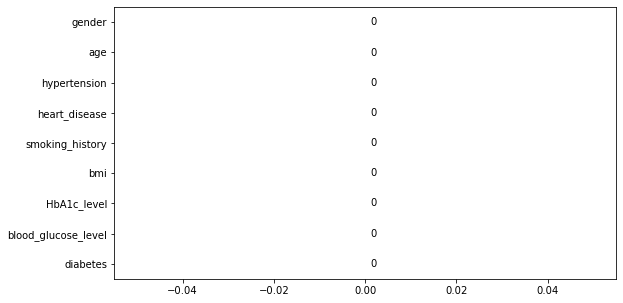

In [59]:
#Visualizing Null values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=data.isna().sum(),
           y=data.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points',
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

tawika maach aana hata valeur nulle


<Figure size 1440x1440 with 0 Axes>

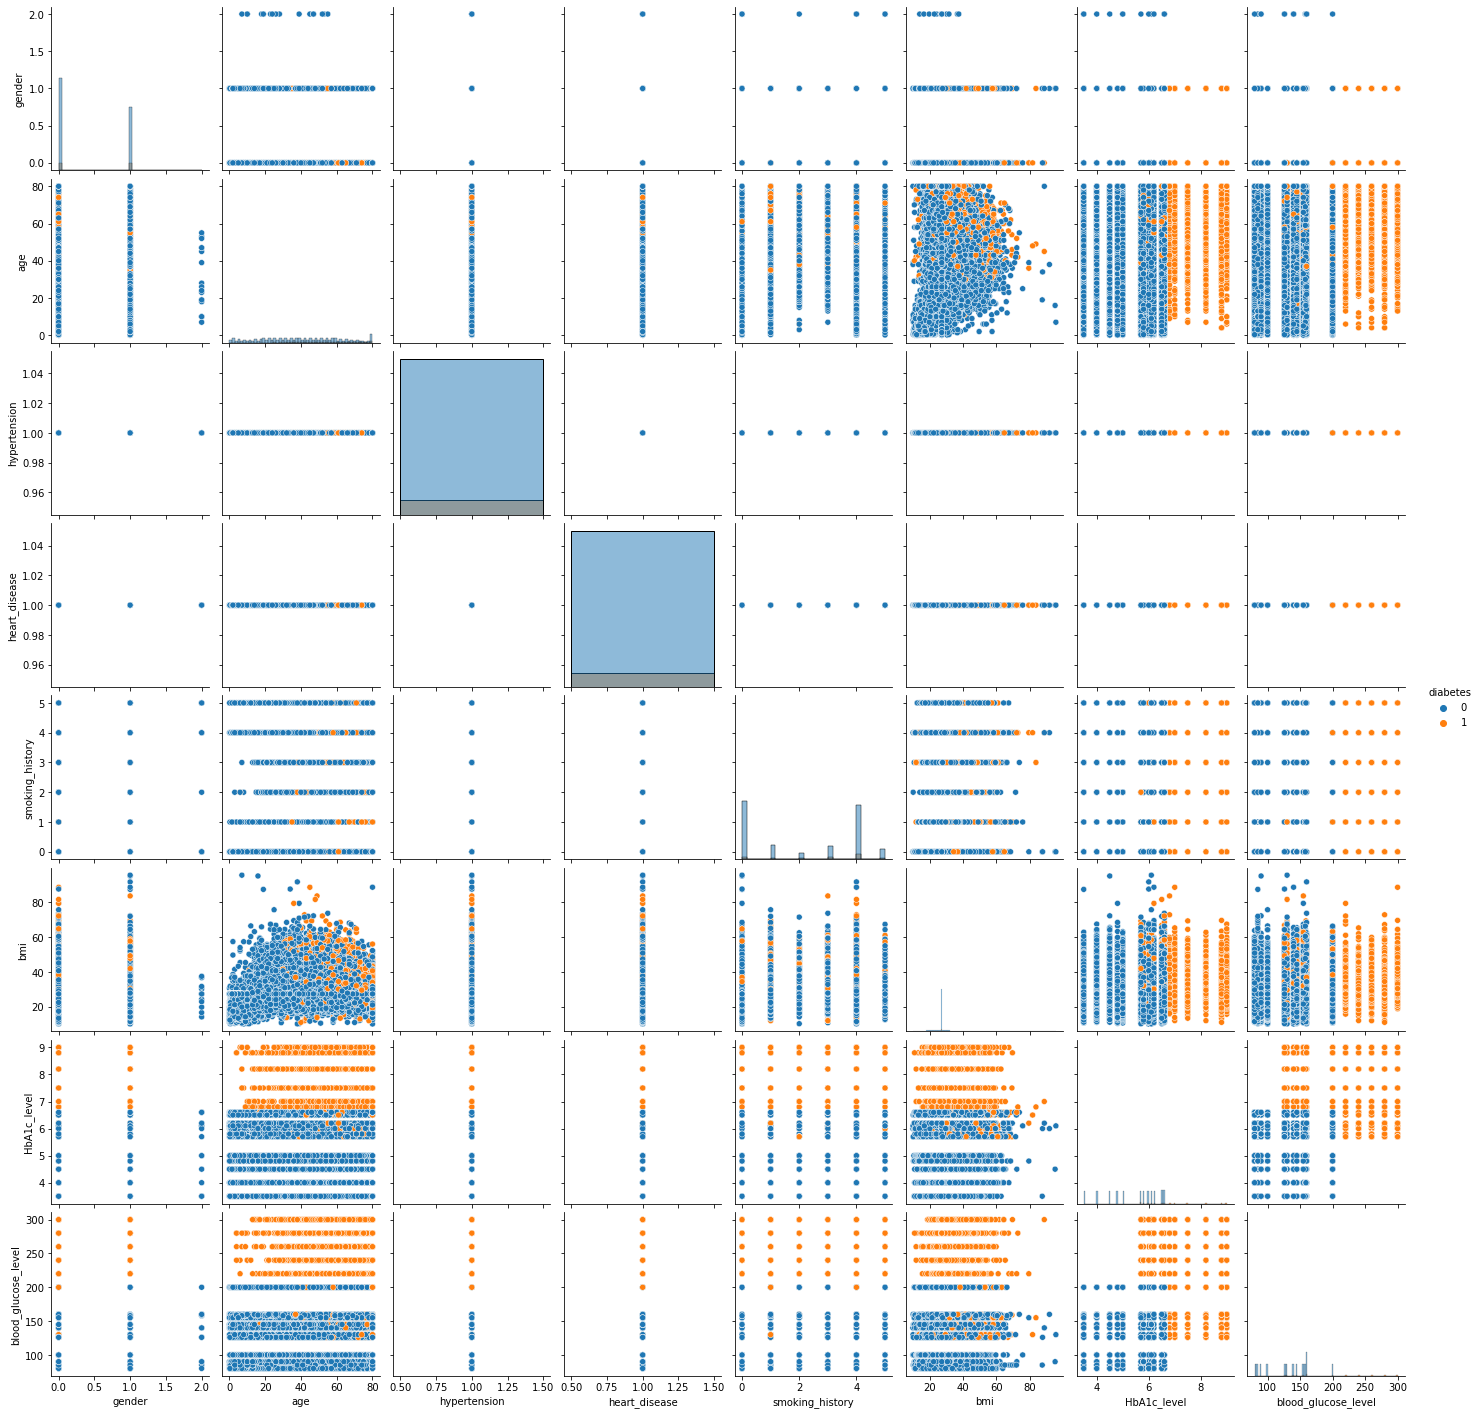

In [60]:
#Plot pairwise relationships in a dataset
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue="diabetes", diag_kind="hist")
plt.show()

**Data Preprocessing**
There are mainly 3 things to be performed
1. Extracting input and output features.
2. Splitting the dataset into Training and Testing set.
3. Feature Scaling.





**Extracting input(independent) and output(dependent) feature**

In [61]:
# Assuming 'dataset' is your DataFrame
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)
for value in y[:9]:
    print(value)

[[  0.    80.     1.   ...  25.19   6.6  140.  ]
 [  0.    54.     1.   ...  27.32   6.6   80.  ]
 [  1.    28.     1.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     1.   ...  27.83   5.7  155.  ]
 [  0.    24.     1.   ...  35.42   4.   100.  ]
 [  0.    57.     1.   ...  22.43   6.6   90.  ]]
0
0
0
0
0
0
1
0
0


**Handling Class Imbalance Problem using Over Sampling**

**Splitting the Dataset into Training and Test Set**

In [62]:
#split the dataset in Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [63]:
print(X_train.shape)
print(X_train)

(80000, 8)
[[  0.     2.     1.   ...  16.45   6.2  159.  ]
 [  0.    55.     1.   ...  24.59   6.   130.  ]
 [  0.    24.     1.   ...  21.77   4.5  130.  ]
 ...
 [  1.    66.     1.   ...  41.23   9.   145.  ]
 [  0.    37.     1.   ...  30.18   5.8   90.  ]
 [  0.    52.     1.   ...  27.32   4.5  158.  ]]


In [64]:
print(y_train.shape)
print(y_train)

(80000,)
[0 0 0 ... 1 0 0]


In [65]:
print(X_test.shape)
print(X_test)
print(y_test.shape)
print(y_test)

(20000, 8)
[[  0.    52.     1.   ...  27.32   4.8  140.  ]
 [  1.    56.     1.   ...  27.32   4.8  100.  ]
 [  0.    22.     1.   ...  37.16   6.6   85.  ]
 ...
 [  0.    80.     1.   ...  28.56   4.8  158.  ]
 [  0.    49.     1.   ...  27.32   3.5  145.  ]
 [  1.     4.     1.   ...  16.36   5.7  155.  ]]
(20000,)
[0 0 0 ... 0 0 0]


**Feature Scaling**

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
#Notice the mean ~ 0 and std ~ 1 for all the input features
pd.DataFrame(X_train, columns=data.columns[:-1]).describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
count,8.000000e+04,8.000000e+04,80000.0,80000.0,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,-6.284695e-17,-4.159589e-17,0.0,0.0,-2.960021e-16,-4.995122e-13,1.090923e-12,-2.117882e-15
std,1.000006e+00,1.000006e+00,0.0,0.0,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-8.408733e-01,-1.858123e+00,0.0,0.0,-1.153482e+00,-2.604917e+00,-1.892971e+00,-1.425757e+00
25%,-8.408733e-01,-7.959540e-01,0.0,0.0,-1.153482e+00,-5.574494e-01,-6.791473e-01,-9.337313e-01
50%,-8.408733e-01,4.774229e-02,0.0,0.0,4.350081e-01,-2.739182e-03,2.545634e-01,5.032041e-02
75%,1.187772e+00,8.026285e-01,0.0,0.0,9.645049e-01,3.400086e-01,6.280477e-01,5.177450e-01
max,3.216416e+00,1.690730e+00,0.0,0.0,1.494002e+00,1.027518e+01,3.242438e+00,3.986527e+00


**Training Various Classification models**

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#function to display an exquisite confusion matrix
def disp_cm(y_test, y_pred)->float:
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score
#function to generate performance report of a classifer
def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

In [69]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16236\404578007.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = data.dropna('columns')


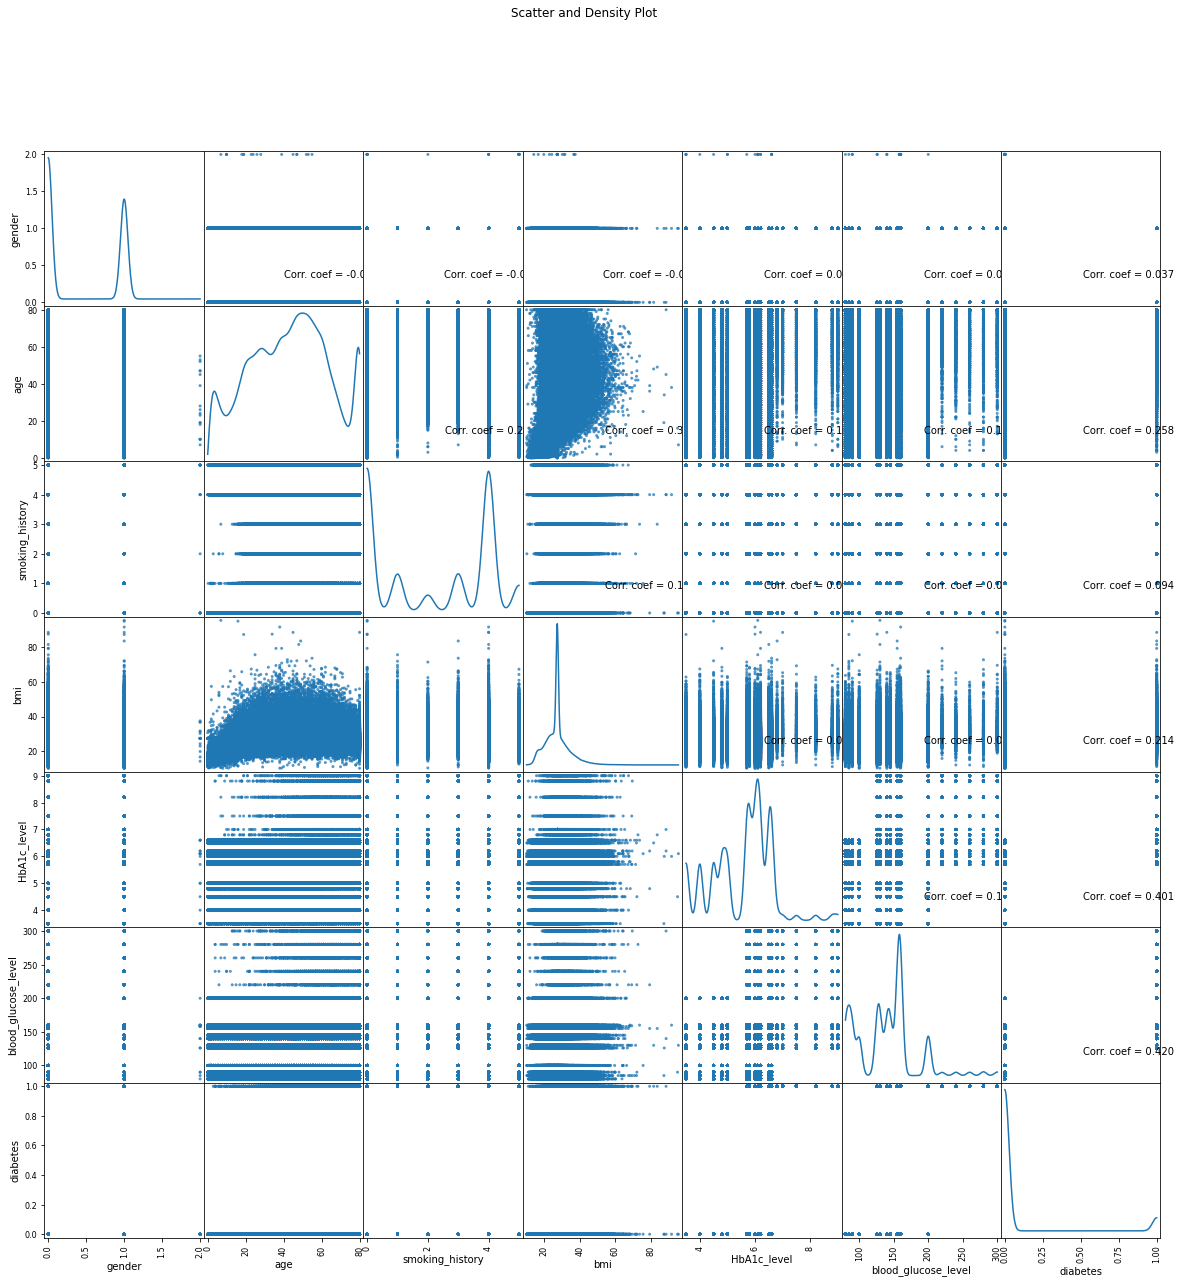

In [70]:
plotScatterMatrix(data, 20, 10)

**Logistic Regression**

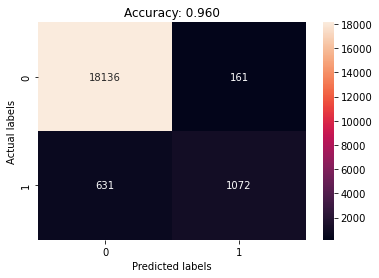

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.87      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [71]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0)
log_acc = judge_clf(log_clf)

**KNN**

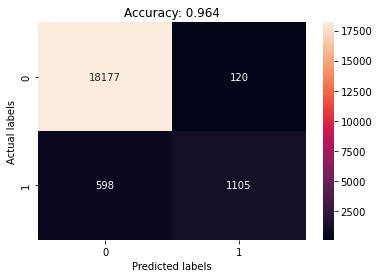

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.90      0.65      0.75      1703

    accuracy                           0.96     20000
   macro avg       0.94      0.82      0.87     20000
weighted avg       0.96      0.96      0.96     20000



In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_acc = judge_clf(knn_clf)

**SVM LINEAIRE**

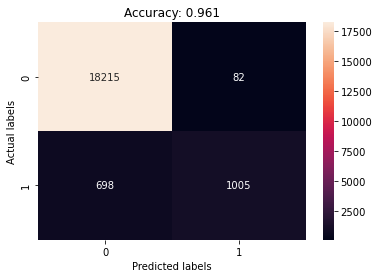

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18297
           1       0.92      0.59      0.72      1703

    accuracy                           0.96     20000
   macro avg       0.94      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [73]:
from sklearn.svm import SVC
lsvm = SVC(kernel="linear", random_state=0)
lsvm_acc = judge_clf(lsvm)

**Kernel SVM**

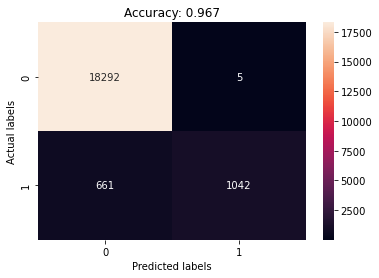

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       1.00      0.61      0.76      1703

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.87     20000
weighted avg       0.97      0.97      0.96     20000



In [74]:
ksvm = SVC(kernel="rbf", random_state=0)
ksvm_acc = judge_clf(ksvm)

**Naive Bayes**

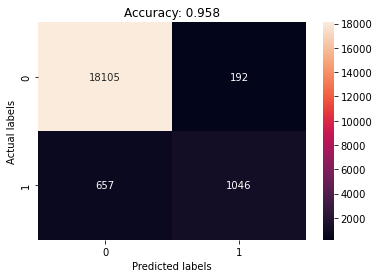

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18297
           1       0.84      0.61      0.71      1703

    accuracy                           0.96     20000
   macro avg       0.90      0.80      0.84     20000
weighted avg       0.95      0.96      0.95     20000



In [75]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
naiveb_acc = judge_clf(nb_clf)

**Decision Trees**

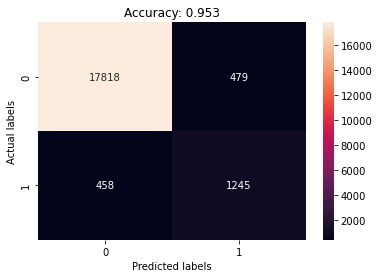

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18297
           1       0.72      0.73      0.73      1703

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion="entropy",
                                             random_state=0
                                  )
dtree_acc = judge_clf(dtree_clf)

**Random Forest**

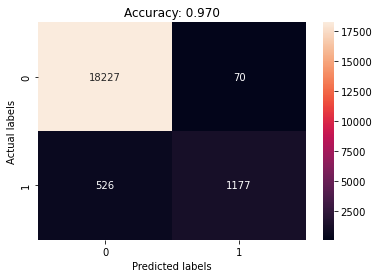

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18297
           1       0.94      0.69      0.80      1703

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [77]:
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_estimators=100,
                                            criterion="entropy",
                                            random_state=0)
rfor_acc = judge_clf(rfor_clf)

**XGBoost**

In [78]:
#from xgboost import XGBClassifier
#xgb_clf = XGBClassifier(use_label_encoder=False,
 #                      verbosity=0)
#xgb_acc = judge_clf(xgb_clf)

ModuleNotFoundError: No module named 'xgboost'

**MLP (Multi-Layer-Perceptron) classifier**

In [79]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

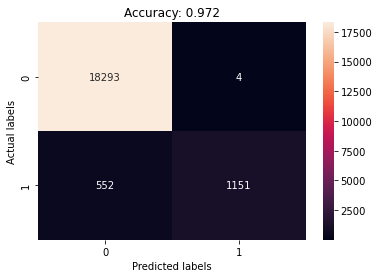

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18297
           1       1.00      0.68      0.81      1703

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [80]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0)
mlp_acc = judge_clf(mlp_clf)

**Comparing Models bin les modéles eli khadmethom**

In [81]:
models = pd.DataFrame({
    'Model': ["Logistic Regr", "KNN", "SVM-Linear", "SVM-RBF",
             "Naive Bayes", "Decision-Tree", "Radom Forest",
             "MLP"],
    'Accuracy Score': [log_acc, knn_acc, lsvm_acc, ksvm_acc,
                       naiveb_acc, dtree_acc, rfor_acc,
                       mlp_acc]
})

models.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,MLP,0.97220
1,Radom Forest,0.97020
2,SVM-RBF,0.96670
3,KNN,0.96410
4,SVM-Linear,0.96100
5,Logistic Regr,0.96040
6,Naive Bayes,0.95755
7,Decision-Tree,0.95315


**K-Fold Cross Validation**

In [82]:
from sklearn.model_selection import cross_val_score
def perform_kfold(clf, X_train=X_train, y_train=y_train)->(float, float):
    """Performs k-fold cross validation on given data(X_train, y_train) using
    the `clf` (aka classifier)

    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.

    Returns:
    mean_score (float): Mean of Accuracy scores after operation.
    std_score  (float): Standard Deviation of Accuracy scores.
    """
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train,
                            cv=10 #number of folds
                            )

    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Mean Accuracy: {mean_score*100:0.3f} %")
    print(f"Standard Deviation: {std_score*100:0.3f} %")

    return mean_score, std_score


In [83]:
#logistic regression:
log_macc, log_std = perform_kfold(log_clf)

Mean Accuracy: 95.980 %
Standard Deviation: 0.173 %


In [84]:
#KNN:
knn_macc, knn_std = perform_kfold(knn_clf)

Mean Accuracy: 96.275 %
Standard Deviation: 0.270 %


In [85]:
#svm with linear kernel :
lsvm_macc, lsvm_std = perform_kfold(lsvm)


Mean Accuracy: 95.992 %
Standard Deviation: 0.227 %


In [86]:
#svm without linear kernel:
ksvm_macc, ksvm_std = perform_kfold(ksvm)

Mean Accuracy: 96.459 %
Standard Deviation: 0.241 %


In [87]:
#naives bayes:
naiveb_macc, naiveb_std = perform_kfold(nb_clf)

Mean Accuracy: 95.586 %
Standard Deviation: 0.263 %


In [88]:
#decision tree
dtree_macc, dtree_std = perform_kfold(dtree_clf)

Mean Accuracy: 95.259 %
Standard Deviation: 0.330 %


In [89]:
#random forest
rfor_macc, rfor_std = perform_kfold(rfor_clf)

Mean Accuracy: 96.913 %
Standard Deviation: 0.226 %


In [90]:
#xgboot
#xgb_macc, xgb_std = perform_kfold(xgb_clf)

In [91]:
#mlp classifier
mlp_macc, mlp_std = perform_kfold(mlp_clf)

Mean Accuracy: 97.156 %
Standard Deviation: 0.161 %


In [93]:
#comparaison entre les modéles apres cross validation
models_1 = pd.DataFrame({
    "Model": ["Logistic Regr", "KNN", "SVM-Linear", "SVM-RBF",
             "Naive Bayes", "Decision-Tree", "Radom Forest",
             "MLP"],
    "Mean Accuracy Score": [log_macc, knn_macc, lsvm_macc, ksvm_macc,
                       naiveb_macc, dtree_macc, rfor_macc,
                       mlp_macc],
    "Stadard Dev": [log_std, knn_std, lsvm_std, ksvm_std,
                       naiveb_std, dtree_std, rfor_std,
                       mlp_std]
})

models_1.sort_values(by = 'Mean Accuracy Score', ascending = False,
                     ignore_index=True)

,Model,Mean Accuracy Score,Stadard Dev
0,MLP,0.971562,0.001609
1,Radom Forest,0.969125,0.002259
2,SVM-RBF,0.964588,0.002406
3,KNN,0.962750,0.002699
4,SVM-Linear,0.959925,0.002267
5,Logistic Regr,0.959800,0.001730
6,Naive Bayes,0.955863,0.002626
7,Decision-Tree,0.952588,0.003304


In [94]:
import pickle

In [95]:
filename='diabetes_model.sav'
pickle.dump(RandomForestClassifier , open(filename, 'wb'))

In [96]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))